# Previsão de Renda

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

prev_ven = pd.read_csv('previsao_de_venda.csv')
prev_ven.head(3)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98


In [27]:
prev_ven.dtypes
prev_ven_qtd = prev_ven[['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]
prev_ven_qtd.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='renda', ylabel='tempo_emprego'>

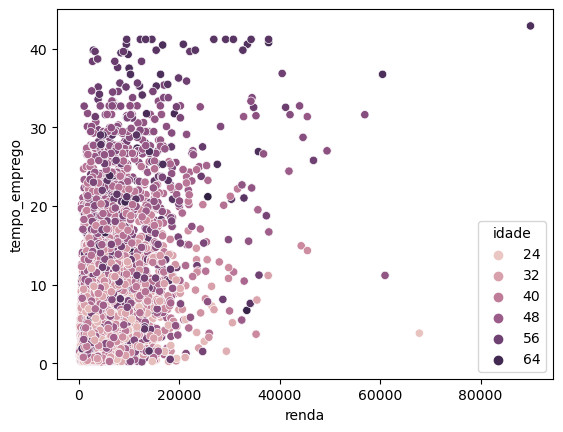

In [28]:
sns.scatterplot(x='renda',
               y='tempo_emprego',
               hue='idade',
               data=prev_ven_qtd)

3) Na sua opinião, há outliers na variável renda?

In [29]:
Sim, existe um valor com renda próximo a 90000 e 45 anos que está muito fora da linha.

SyntaxError: invalid syntax (2025582884.py, line 1)

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<AxesSubplot:xlabel='natural_log', ylabel='tempo_emprego'>

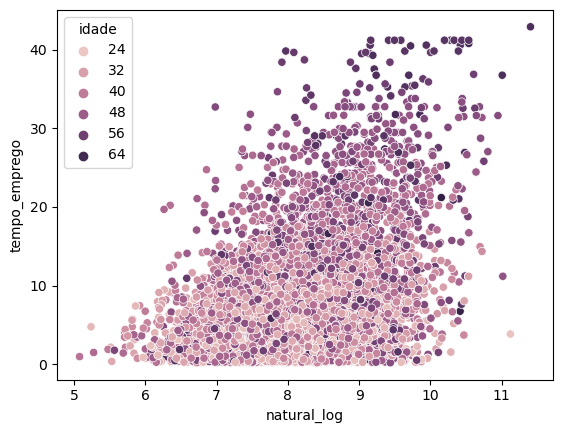

In [37]:
prev_ven_qtd['natural_log'] = np.log(prev_ven_qtd['renda'])
prev_ven_qtd
sns.scatterplot(x='natural_log',
               y='tempo_emprego',
               hue='idade',
               data=prev_ven_qtd)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [16]:
Os valores ficaram menos dispersos, 
então o logaritmo natural me deu uma correlação interessante entre o tempo de emprego, idade e renda.

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object